In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.types as fot

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    splits="train",
    download_if_necessary=True,
    classes=["person", "car"],
    max_samples=1000,
    dataset_name="coco-cars-people"
)

Found annotations at 'C:\Users\4080\fiftyone\coco-2017\raw\instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading 'coco-2017' split 'train'
 100% |███████████████| 1000/1000 [3.9s elapsed, 0s remaining, 247.1 samples/s]      
Dataset 'coco-cars-people' created


In [19]:
cardetection_dir = "datasets\cardetection\car"

cardetection = fo.Dataset.from_dir(
    dataset_dir=cardetection_dir,
    dataset_type=fot.YOLOv5Dataset,
    split='train',
    label_field="ground_truth"
)

 100% |███████████████| 3530/3530 [17.2s elapsed, 0s remaining, 202.7 samples/s]      


In [20]:
cardetection_val = fo.Dataset.from_dir(
    dataset_dir=cardetection_dir,
    dataset_type=fot.YOLOv5Dataset,
    split='val',
    label_field="ground_truth"
)

 100% |█████████████████| 801/801 [455.7ms elapsed, 0s remaining, 1.8K samples/s]      


In [29]:
combined_dataset = cardetection.clone()
combined_dataset.name = "merged-coco-yolo"

In [30]:
combined_dataset.add_samples(dataset)

 100% |███████████████| 1000/1000 [6.5s elapsed, 0s remaining, 137.9 samples/s]      


['69244e56bb845dabd0808d7a',
 '69244e56bb845dabd0808dd4',
 '69244e56bb845dabd0808dd5',
 '69244e56bb845dabd0808dd6',
 '69244e56bb845dabd0808dd7',
 '69244e56bb845dabd0808dd8',
 '69244e56bb845dabd0808dd9',
 '69244e56bb845dabd0808dda',
 '69244e56bb845dabd0808ddb',
 '69244e56bb845dabd0808fc0',
 '69244e56bb845dabd0808fc1',
 '69244e56bb845dabd0808fc2',
 '69244e56bb845dabd0808fc3',
 '69244e56bb845dabd0808fc4',
 '69244e56bb845dabd0808fc5',
 '69244e56bb845dabd0808fc6',
 '69244e56bb845dabd0808fc7',
 '69244e56bb845dabd0808fc8',
 '69244e56bb845dabd0808fc9',
 '69244e56bb845dabd0808fca',
 '69244e56bb845dabd0808fcb',
 '69244e56bb845dabd0808fcc',
 '69244e56bb845dabd0808fcd',
 '69244e56bb845dabd0808fce',
 '69244e56bb845dabd0808fcf',
 '69244e56bb845dabd0808fd0',
 '69244e56bb845dabd0808fd1',
 '69244e56bb845dabd0808fd2',
 '69244e56bb845dabd0808fd3',
 '69244e56bb845dabd0808fd4',
 '69244e56bb845dabd0808fd5',
 '69244e56bb845dabd0808fd6',
 '69244e56bb845dabd0808fd7',
 '69244e56bb845dabd0808fd8',
 '69244e56bb84

In [31]:
session = fo.launch_app(combined_dataset)
session.wait()

Notebook sessions cannot wait


In [33]:
# 4. Save and Launch App
combined_dataset.persistent = True # Keeps dataset available in FiftyOne app after script finishes
print(f"{len(combined_dataset)}")

4530


In [21]:
dataset.add_samples(cardetection)

dataset.add_samples(cardetection_val)

 100% |███████████████| 3530/3530 [2.7s elapsed, 0s remaining, 1.2K samples/s]      
 100% |█████████████████| 801/801 [619.3ms elapsed, 0s remaining, 1.3K samples/s]      


['69244b76bb845dabd0804b9b',
 '69244b76bb845dabd0804ba4',
 '69244b76bb845dabd0804ba5',
 '69244b76bb845dabd0804ba6',
 '69244b76bb845dabd0804ba7',
 '69244b76bb845dabd0804ba8',
 '69244b76bb845dabd0804ba9',
 '69244b76bb845dabd0804baa',
 '69244b76bb845dabd0804bab',
 '69244b76bb845dabd0804bec',
 '69244b76bb845dabd0804bed',
 '69244b76bb845dabd0804bee',
 '69244b76bb845dabd0804bef',
 '69244b76bb845dabd0804bf0',
 '69244b76bb845dabd0804bf1',
 '69244b76bb845dabd0804bf2',
 '69244b76bb845dabd0804bf3',
 '69244b76bb845dabd0804bf4',
 '69244b76bb845dabd0804bf5',
 '69244b76bb845dabd0804bf6',
 '69244b76bb845dabd0804bf7',
 '69244b76bb845dabd0804bf8',
 '69244b76bb845dabd0804bf9',
 '69244b76bb845dabd0804bfa',
 '69244b76bb845dabd0804bfb',
 '69244b76bb845dabd0804bfc',
 '69244b76bb845dabd0804bfd',
 '69244b76bb845dabd0804bfe',
 '69244b76bb845dabd0804bff',
 '69244b76bb845dabd0804c00',
 '69244b76bb845dabd0804c01',
 '69244b76bb845dabd0804c02',
 '69244b76bb845dabd0804c03',
 '69244b76bb845dabd0804c04',
 '69244b76bb84

In [ ]:
merged_coco_yolo = fo.load_dataset("merged-coco-yolo")

# Define where to save the data on disk
export_dir = "datasets/merged_coco_yolo"

# Define the specific classes you want to train on
# This ensures consistent ID mapping (0=person, 1=car)
target_classes = [
    'person', 
    'car',
    'Green Light', 
    'Red Light', 
    'Speed Limit 10', 
    'Speed Limit 100',
    'Speed Limit 110',
    'Speed Limit 120',
    'Speed Limit 20', 
    'Speed Limit 30',
    'Speed Limit 40', 
    'Speed Limit 50',
    'Speed Limit 60', 
    'Speed Limit 70',
    'Speed Limit 80',
    'Speed Limit 90',
    'Stop'
]


# Export
print(f"Exporting data to {export_dir}...")
merged_coco_yolo.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset, # Yolo format
    label_field="ground_truth",          # Ensure this matches your label field name
    split="train",                       # Puts all data into a 'train' folder
    classes=target_classes,              # Filters only these classes
)

Exporting data to datasets/merged_coco_yolo...
  79% |███████████|---| 3598/4530 [4.0s elapsed, 1.1s remaining, 833.4 samples/s]    

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'kite' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bus' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'suitcase' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cell phone' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bench' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\f

  82% |████████████\--| 3706/4530 [4.3s elapsed, 1.2s remaining, 645.4 samples/s]    

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'scissors' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cow' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'vase' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cat' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'donut' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone

  84% |████████████/--| 3783/4530 [4.5s elapsed, 1.4s remaining, 515.4 samples/s]    

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'carrot' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'spoon' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'giraffe' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cake' not in provided classes
  warnings.warn(msg)


  85% |████████████\--| 3862/4530 [4.7s elapsed, 1.6s remaining, 391.6 samples/s]    

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'snowboard' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'orange' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'pizza' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'apple' not in provided classes
  warnings.warn(msg)


  90% |█████████████/-| 4097/4530 [5.4s elapsed, 1.1s remaining, 387.5 samples/s]    

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'teddy bear' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'couch' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'sheep' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bed' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'mouse' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fif

 100% |███████████████| 4530/4530 [6.6s elapsed, 0s remaining, 351.5 samples/s]      


c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'toilet' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'broccoli' not in provided classes
  warnings.warn(msg)


In [37]:
merged_coco_yolo.export(
    export_dir="datasets/merged_coco_yolo_val",
    dataset_type=fo.types.YOLOv5Dataset, # YOLO11 uses the same format as v5/v8
    label_field="ground_truth",          # Ensure this matches your label field name
    split="val",                       # Puts all data into a 'train' folder
    classes=target_classes,              # Filters only these classes
)

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'kite' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bus' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'suitcase' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cell phone' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bench' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\f

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'boat' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'fire hydrant' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'scissors' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cow' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'vase' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'donut' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'elephant' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bear' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'carrot' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'spoon' not in provided classes
  warnings.warn(msg)


  84% |████████████/--| 3820/4530 [4.6s elapsed, 1.5s remaining, 439.5 samples/s]     

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'giraffe' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'cake' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'snowboard' not in provided classes
  warnings.warn(msg)


  86% |████████████\--| 3898/4530 [4.8s elapsed, 1.6s remaining, 365.7 samples/s]     

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'orange' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'pizza' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'apple' not in provided classes
  warnings.warn(msg)


  90% |█████████████|-| 4095/4530 [5.3s elapsed, 1.1s remaining, 381.3 samples/s]     

c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'teddy bear' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'couch' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'sheep' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'bed' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'mouse' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fif

 100% |███████████████| 4530/4530 [6.5s elapsed, 0s remaining, 351.9 samples/s]       


c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'toilet' not in provided classes
  warnings.warn(msg)
c:\Users\4080\OneDrive\Документы\damir-z\venv\lib\site-packages\fiftyone\utils\yolo.py:1030: UserWarning: Ignoring object with label 'broccoli' not in provided classes
  warnings.warn(msg)


In [40]:
import os
import shutil
import random
from pathlib import Path

# Define paths
base_dir = Path("datasets/merged_coco_yolo")
images_train = base_dir / "images" / "train"
labels_train = base_dir / "labels" / "train"
images_val = base_dir / "images" / "val"
labels_val = base_dir / "labels" / "val"

# Create val directories
images_val.mkdir(parents=True, exist_ok=True)
labels_val.mkdir(parents=True, exist_ok=True)

# Get list of images
image_files = list(images_train.glob("*.jpg")) + list(images_train.glob("*.png"))
num_val = int(len(image_files) * 0.2) # 20% for validation

# Shuffle and select
random.shuffle(image_files)
val_files = image_files[:num_val]

print(f"Moving {len(val_files)} images to validation...")

for img_path in val_files:
    # Move Image
    shutil.move(str(img_path), str(images_val / img_path.name))
    
    # Move matching Label
    label_name = img_path.stem + ".txt"
    label_src = labels_train / label_name
    if label_src.exists():
        shutil.move(str(label_src), str(labels_val / label_name))

print("Done.")

Moving 906 images to validation...
Done.


In [1]:
import torch
print(torch.cuda.is_available()) 

True


In [5]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [4]:
from ultralytics import YOLO

# 1. Load the YOLO11 Nano model
# It will auto-download 'yolo11n.pt' if not present
model = YOLO("yolo11n.pt")

results = model.train(
    data="datasets/merged_coco_yolo/dataset.yaml",
    epochs=50,           # Adjust based on dataset size
    imgsz=640,           # Standard image size
    batch=16,            # Adjust based on your GPU memory
    project="yolo11_cars_people",
    name="run_2"
)

New https://pypi.org/project/ultralytics/8.3.231 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.9.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/merged_coco_yolo/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_2, nbs=64, nm

first success
let's train a bigger model

In [11]:
# Load a bigger YOLOv11 model
model = YOLO("yolo11l.pt")

results = model.train(
    data="datasets/merged_coco_yolo/dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=16,         
    project="yolo11_large_cars_people",
    name="run_1"
)

New https://pypi.org/project/ultralytics/8.3.231 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.9.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/merged_coco_yolo/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_1, nbs=64, nm

In [8]:
%load_ext tensorboard


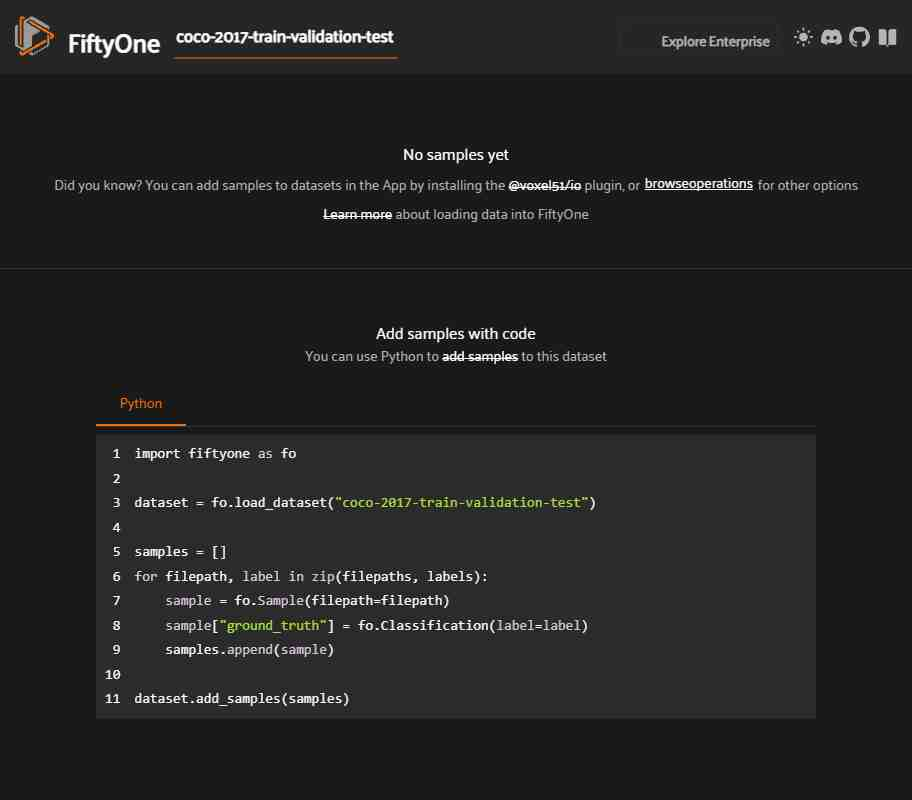

In [14]:
session = fo.launch_app(dataset)

In [10]:
print(dataset)

Name:        coco-2017-train-validation-test
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField


Converting existing index 'filepath' to unique on dataset '2025.11.24.14.56.02.858936'
Converting existing index 'filepath' to unique on dataset 'coco-2017-validation-train'


In [42]:
import fiftyone.utils.random as four
four.random_split(
    dataset, 
    {"train": 0.7, "test": 0.2, "val": 0.1}
)

In [ ]:
dataset.export(
    export_dir="datasets/combined",
    dataset_type=fot.YOLOv5Dataset,
    label_field="ground_truth",
    classes=[
        'person', 
        'car',
        'Green Light', 
        'Red Light', 
        'Speed Limit 10', 
        'Speed Limit 100',
        'Speed Limit 110',
        'Speed Limit 120',
        'Speed Limit 20', 
        'Speed Limit 30',
        'Speed Limit 40', 
        'Speed Limit 50',
        'Speed Limit 60', 
        'Speed Limit 70',
        'Speed Limit 80',
        'Speed Limit 90',
        'Stop'
        ]
)

In [46]:
import fiftyone.utils.data as foud

In [48]:
import fiftyone as fo
import fiftyone.utils.data as foud

dataset = fo.Dataset.from_dir(
    dataset_dir="datasets/combined",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
)

# Perform random split
splits = foud.random_split(dataset, [0.7, 0.2, 0.1], seed=51)
train_ds, val_ds, test_ds = splits

# Export each subset
train_ds.export(
    export_dir="datasets/combined_split/train",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
)
val_ds.export(
    export_dir="datasets/combined_split/val",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
)
test_ds.export(
    export_dir="datasets/combined_split/test",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
)

 100% |█████████████| 71517/71517 [7.6m elapsed, 0s remaining, 202.5 samples/s]      


AttributeError: module 'fiftyone.utils.data' has no attribute 'random_split'

In [44]:
labels = dataset.distinct("ground_truth.detections.label")
print(labels)

['Green Light', 'Red Light', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop', 'airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow', 'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorcycle', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet',

In [25]:
from ultralytics import YOLO

In [40]:
model = YOLO("yolo11n.pt") 
model.train(data="datasets/combined_coco/dataset.yaml", epochs=50, imgsz=640, batch=16, name="merged_run")

New https://pypi.org/project/ultralytics/8.3.231 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.9.13 torch-2.8.0+cpu CPU (13th Gen Intel Core i9-13900K)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/combined_coco/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=merged_run2, nbs=64, nms=Fa

RuntimeError: Dataset 'datasets/combined_coco/dataset.yaml' error  'datasets/combined_coco/dataset.yaml' does not exist

In [12]:
# Load a bigger YOLOv11 model
model = YOLO("yolo11n.pt")

results = model.train(
    data="datasets/merged_coco_yolo/dataset.yaml",
    epochs=20,
    imgsz=640,
    batch=16,         
    project="yolo11_large_cars_people_train_on_20_epochs",
    name="run_1"
)

New https://pypi.org/project/ultralytics/8.3.232 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.9.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/merged_coco_yolo/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_1, nbs=64, nm